In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

## Load data

In [ ]:
# Load significant miRNAs associated to treatments, divided into modules
path_miRNA = '/WGCNA_miRNA/output/'
file_list = ['significant_genes_black_data.GEMTAX.vs.all.txt',
    'significant_genes_blue_data.VSGT.vs.all.txt',
    'significant_genes_brown_data.VSGT.vs.all.txt',
    'significant_genes_red_data.VSGT.vs.all.txt',
    'significant_genes_yellow_data.VSGT.vs.all.txt']
 
miRNA_data = {}  # Dizionario per salvare i contenuti dei file con il nome desiderato
 
for value in file_list:
    with open(path_miRNA + value, "r", encoding="utf-8") as file:
        miRNA_data['miRNA_'+value.split('_')[2]+'_'+value.split('.')[1].replace('GEMTAX', 'GT')] = [x.replace('\n', '').replace('.', '-') for x in file.readlines()]  # Salva nel dizionario
 
miRNA_data.keys()

dict_keys(['miRNA_black_GT', 'miRNA_blue_VSGT', 'miRNA_brown_VSGT', 'miRNA_red_VSGT', 'miRNA_yellow_VSGT'])

In [ ]:
# Load significant GENES associated to treatments, divided into modules
path_RNA = '/WGCNA_mRNA/output/'
file_list1 = [
    'significant_genes_green_data.VS_GEMTAX.vs.all.txt',
    'significant_genes_green_data.CTR.vs.all.txt',
    'significant_genes_greenyellow_data.VPA.vs.all.txt',
    'significant_genes_magenta_data.VS_GEMTAX.vs.all.txt',
    'significant_genes_pink_data.VS_GEMTAX.vs.all.txt',
    'significant_genes_red_data.VS_GEMTAX.vs.all.txt',
    'significant_genes_tan_data.GEMTAX.vs.all.txt',
    'significant_genes_tan_data.VPA_SIM.vs.all.txt'
]
 
RNA_data = {}  # Dizionario per salvare i contenuti dei file con il nome desiderato
 
for value in file_list1:
    with open(path_RNA + value, "r", encoding="utf-8") as file:
        RNA_data['RNA_'+value.split('_')[2]+'_'+value.split('.')[1].replace('VS_GEMTAX', 'VSGT').replace('VPA_SIM', 'VS').replace('GEMTAX', 'GT')] = [x.replace('\n', '').replace('.', '-') for x in file.readlines()]  # Salva nel dizionario
RNA_data.keys()

dict_keys(['RNA_green_VSGT', 'RNA_green_CTR', 'RNA_greenyellow_VPA', 'RNA_magenta_VSGT', 'RNA_pink_VSGT', 'RNA_red_VSGT', 'RNA_tan_GT', 'RNA_tan_VS'])

In [ ]:
# Load data and map gene id because WGCNA was done with gene_id but mirtarbase uses gene_name
rna_data_path = '/WGCNA_mRNA/data/'
dict_id_name = pd.read_csv(rna_data_path+'salmon.merged.gene_counts.tsv', sep='\t', usecols=['gene_id', 'gene_name'])
# Crea una mappa da gene_id a gene_name
id_to_name = dict(zip(dict_id_name['gene_id'], dict_id_name['gene_name']))
# Applica la mappatura a ciascuna lista nel dizionario, sovrascrivendo RNA_data
RNA_data = {
    key: [id_to_name.get(gene_id, gene_id) for gene_id in gene_list] for key, gene_list in RNA_data.items()
}

In [ ]:
# load DB with miRNA targets
mirna_db = pd.read_csv('/data/miRTarBase_MTI.csv')

# Keep only homo sapiens and drop duplicated rows
print(mirna_db.shape)
mirna_db_hsa = mirna_db[mirna_db['Species (miRNA)']=='hsa'].drop_duplicates() # togliamo i duplicati quando le righe sono esattamente uguali tra loro per tutte le colonne 
print(mirna_db_hsa.shape)
mirna_db_hsa

(4671966, 9)
(1859322, 9)


,miRTarBase ID,miRNA,Species (miRNA),Target Gene,Target Gene (Entrez ID),Species (Target Gene),Experiments,Support Type,References (PMID)
9,MIRT003105,hsa-miR-122-5p,hsa,SLC7A1,6541.0,hsa,Luciferase reporter assay//Western blot,Functional MTI,17179747.0
10,MIRT003105,hsa-miR-122-5p,hsa,SLC7A1,6541.0,hsa,Luciferase reporter assay//Western blot,Non-Functional MTI,17179747.0
32,MIRT003112,hsa-miR-122-5p,hsa,ADAM17,6868.0,hsa,Luciferase reporter assay//qRT-PCR,Functional MTI,19296470.0
33,MIRT003112,hsa-miR-122-5p,hsa,ADAM17,6868.0,hsa,Luciferase reporter assay//qRT-PCR,Non-Functional MTI,19296470.0
34,MIRT003111,hsa-miR-122-5p,hsa,NUMBL,9253.0,hsa,Luciferase reporter assay//qRT-PCR,Non-Functional MTI,19296470.0
...,...,...,...,...,...,...,...,...,...
4671909,MIRT2696484,hsa-miR-875-3p,hsa,ZZEF1,23140.0,hsa,CLIP-seq,Functional MTI (Weak),NaN
4671912,MIRT2696485,hsa-miR-1322,hsa,ZZZ3,26009.0,hsa,CLIP-seq,Functional MTI (Weak),NaN
4671937,MIRT2696486,hsa-miR-4307,hsa,ZZZ3,26009.0,hsa,CLIP-seq,Functional MTI (Weak),NaN
4671947,MIRT2696487,hsa-miR-4698,hsa,ZZZ3,26009.0,hsa,CLIP-seq,Functional MTI (Weak),NaN


In [6]:
# print('Numero di miRNA: ', len(mirna_db_hsa.miRNA.unique().tolist()))
# # Keep only targets witha Stong Support
# mirna_db_hsa_strong = mirna_db_hsa[np.logical_not(mirna_db_hsa['Support Type'].str.contains('Weak'))]
# print(mirna_db_hsa_strong.shape)
# print('Numero di miRNA rimanenti: ', len(mirna_db_hsa.miRNA.unique().tolist()))

# Keep only targets witha Stong Support
mirna_db_hsa_strong = mirna_db_hsa[np.logical_not(mirna_db_hsa['Support Type'].str.contains('Weak'))]
print(mirna_db_hsa_strong.shape)
print('Numero di miRNA: ', len(mirna_db_hsa.miRNA.unique().tolist()))
print('Numero di miRNA strong: ', len(mirna_db_hsa_strong.miRNA.unique().tolist()))
mirna_db_hsa_strong_func = mirna_db_hsa_strong[mirna_db_hsa_strong['Support Type']=='Functional MTI']
print('Numero di miRNA strong & functional: ', len(mirna_db_hsa_strong_func.miRNA.unique().tolist()))

(15211, 9)
Numero di miRNA:  3056
Numero di miRNA strong:  1024
Numero di miRNA strong & functional:  1021


In [ ]:
# save lists of targets
target_dict = {}
for key in miRNA_data.keys():
    # Create a dict with all info
    target_dict[key] = mirna_db_hsa_strong_func.loc[mirna_db_hsa_strong_func.miRNA.isin(miRNA_data[key]),['miRNA', 'Target Gene', 
                                                                                                'Experiments', 'Support Type']].drop_duplicates()
    # # Save txt files
    # filename = f"{key}_targets.txt"
    # target_dict[key].to_csv(out_path+filename, sep='\t', index=False)

target_dict.keys()

dict_keys(['miRNA_black_GT', 'miRNA_blue_VSGT', 'miRNA_brown_VSGT', 'miRNA_red_VSGT', 'miRNA_yellow_VSGT'])

## Find most connected miRNAs: possible biomarkers

In [ ]:
# Create dict with mirna connections
miRNA_connections_dict = {}
for module,db in target_dict.items():
    miRNA_connections_dict[module] = target_dict[module].groupby('miRNA').count()['Target Gene']
    max_value = miRNA_connections_dict[module].max()
    max_indices = miRNA_connections_dict[module][miRNA_connections_dict[module] == max_value].index.tolist()


## Compare miRNA targets with RNA gene-modules

In [9]:
# Create a dict for each module and each miRNA in it with a list of their target
mirna_genes_dict = {}

for module,db in target_dict.items():
    # print(mirna)
    mirna_genes_dict[module] = db.groupby('miRNA')['Target Gene'].apply(list).to_dict()

# Create a dict for each module with a list of all the miRNAs target in that module
mirna_genes_dict_flat = {}

for module,db in target_dict.items():
    # print(mirna)
    mirna_genes_dict_flat[module] = db['Target Gene'].drop_duplicates().tolist()

In [10]:
# checking that the genes here are deduplicated
[len(x) == len(set(x)) for x in mirna_genes_dict_flat.values()]

[True, True, True, True, True]

### 1. Inspect genes modules searching for miRNAs targets divided into miRNAs modules

In [11]:
# Initialize matrix to see the intersections of genes in transcriptomic modules and miRNA's target modules
matrix_perc = pd.DataFrame(0.0, index=mirna_genes_dict_flat.keys(), columns=RNA_data.keys())
matrix_count = pd.DataFrame(0, index=mirna_genes_dict_flat.keys(), columns=RNA_data.keys())
matrix_overalp = pd.DataFrame([], index=mirna_genes_dict_flat.keys(), columns=RNA_data.keys()) #df with name of targets which are in both mirna and rna modules

# Fill matrix with counts of overlapping genes
for key1, target1 in mirna_genes_dict_flat.items(): # for cycle on miRNA targets
    for key2, genes2 in RNA_data.items(): # for cycle on transcriptomics genes
        if len(target1) > 0 and len(genes2) > 0:
            overlap_perc = round((len(set(target1) & set(genes2)) / len(target1)) * 100, 2)
            overlap_count = len(set(target1) & set(genes2))
            overlap = list(set(target1) & set(genes2))
            # print(overlap)
        else:
            overlap_perc = 0
            overlap_count = 0
            overlap = []
        matrix_perc.loc[key1, key2] = overlap_perc
        matrix_count.loc[key1, key2] = overlap_count
        matrix_overalp.loc[key1, key2] = overlap

# Display the result
matrix_count

,RNA_green_VSGT,RNA_green_CTR,RNA_greenyellow_VPA,RNA_magenta_VSGT,RNA_pink_VSGT,RNA_red_VSGT,RNA_tan_GT,RNA_tan_VS
miRNA_black_GT,0,0,0,0,0,0,0,0
miRNA_blue_VSGT,14,0,0,3,2,23,0,1
miRNA_brown_VSGT,19,0,0,1,5,15,0,0
miRNA_red_VSGT,9,1,0,5,2,6,0,0
miRNA_yellow_VSGT,34,0,0,4,4,22,0,1


### Apply a Test in order to see if the distribution of the targets in the modules is not by chance

In [12]:
# Create a df with the totals per row
dim_modules_RNA = []
[dim_modules_RNA.append(len(genes)) for genes in RNA_data.values()]
total_to_add = pd.DataFrame({'Total_RNA_module': dim_modules_RNA}).T
total_to_add.columns = matrix_count.columns
total_to_add

,RNA_green_VSGT,RNA_green_CTR,RNA_greenyellow_VPA,RNA_magenta_VSGT,RNA_pink_VSGT,RNA_red_VSGT,RNA_tan_GT,RNA_tan_VS
Total_RNA_module,762,10,7,71,198,554,2,9


In [13]:
# Add the total per row to the matrix_count and convert the final df in percentages
df_wilcoxon_test = pd.concat([matrix_count,total_to_add])
df_wilcoxon_test_perc = round(df_wilcoxon_test.div(df_wilcoxon_test.sum(axis=1), axis=0).fillna(0)*100,1)
df_wilcoxon_test_perc

,RNA_green_VSGT,RNA_green_CTR,RNA_greenyellow_VPA,RNA_magenta_VSGT,RNA_pink_VSGT,RNA_red_VSGT,RNA_tan_GT,RNA_tan_VS
miRNA_black_GT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
miRNA_blue_VSGT,32.6,0.0,0.0,7.0,4.7,53.5,0.0,2.3
miRNA_brown_VSGT,47.5,0.0,0.0,2.5,12.5,37.5,0.0,0.0
miRNA_red_VSGT,39.1,4.3,0.0,21.7,8.7,26.1,0.0,0.0
miRNA_yellow_VSGT,52.3,0.0,0.0,6.2,6.2,33.8,0.0,1.5
Total_RNA_module,47.2,0.6,0.4,4.4,12.3,34.3,0.1,0.6


#### Wilcoxon test

The Wilcoxon signed-rank test tests the null hypothesis that two related paired samples come from the same distribution. In particular, it tests whether the distribution of the differences x - y is symmetric about zero. It is a non-parametric version of the paired T-test (assumes normality).

In [14]:
from scipy.stats import wilcoxon

# Create new columns
df_wilcoxon_test_perc['pvals'] = 0.0
df_wilcoxon_test_perc['stats'] =  0.0
cols4test = ['RNA_green_VSGT', 'RNA_greenyellow_VPA', 'RNA_magenta_VSGT',
       'RNA_pink_VSGT', 'RNA_red_VSGT', 'RNA_tan_GT', 'RNA_tan_VS']

# Calculate test and fill columns 
for index in df_wilcoxon_test_perc.index:
    # exclude those with all columns == 0 and set them to nan
    if (df_wilcoxon_test_perc.loc[index,].sum() != float(0)) & (index != 'Total_RNA_module'): 
        # Calcolo del test di Wilcoxon
        result = wilcoxon(df_wilcoxon_test_perc.loc[index, cols4test], df_wilcoxon_test_perc.loc['Total_RNA_module', cols4test])
        df_wilcoxon_test_perc.loc[index, 'pvals'] = round(result.pvalue,2)
        df_wilcoxon_test_perc.loc[index, 'stats'] = round(result.statistic,2)
    else:
        df_wilcoxon_test_perc.loc[index, 'pvals'] = np.nan
        df_wilcoxon_test_perc.loc[index, 'stats'] = np.nan
# print df
df_wilcoxon_test_perc

,RNA_green_VSGT,RNA_green_CTR,RNA_greenyellow_VPA,RNA_magenta_VSGT,RNA_pink_VSGT,RNA_red_VSGT,RNA_tan_GT,RNA_tan_VS,pvals,stats
miRNA_black_GT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
miRNA_blue_VSGT,32.6,0.0,0.0,7.0,4.7,53.5,0.0,2.3,1.00,14.0
miRNA_brown_VSGT,47.5,0.0,0.0,2.5,12.5,37.5,0.0,0.0,0.81,12.0
miRNA_red_VSGT,39.1,4.3,0.0,21.7,8.7,26.1,0.0,0.0,0.30,7.0
miRNA_yellow_VSGT,52.3,0.0,0.0,6.2,6.2,33.8,0.0,1.5,0.94,13.0
Total_RNA_module,47.2,0.6,0.4,4.4,12.3,34.3,0.1,0.6,NaN,NaN


#### Plot info about modules

In [15]:
# define colors for plot
colors_dict = {
    'RNA_green_VSGT': 'darkseagreen',
    'RNA_green_CTR': 'mediumseagreen',
    'RNA_greenyellow_VPA': 'palegreen',
    'RNA_magenta_VSGT': 'orchid',
    'RNA_pink_VSGT': '#fcd4e9',
    'RNA_red_VSGT': '#c94c65',
    'RNA_tan_GT': 'peru',
    'RNA_tan_VS': 'tan'
}

Network visualization

In [17]:
import networkx as nx
from pyvis.network import Network


In [18]:
matrix_color = pd.DataFrame('', index=matrix_count.index, columns=matrix_count.columns)

# Lista di colori da cui scegliere
color_list = ['darkgreen', 'black', 'darkmagenta', 'hotpink', 'red', 'darkgoldenrod']

# Itera attraverso le righe e le colonne di matrix_count
color_col = 0  # Indice per tenere traccia dei colori utilizzati
for col in matrix_count.columns:
    if matrix_count[col].sum() != 0:
        # Assegna un colore dalla lista
        matrix_color[col] = color_list[color_col]
        color_col += 1

# Mostra il DataFrame dei colori
matrix_color

,RNA_green_VSGT,RNA_green_CTR,RNA_greenyellow_VPA,RNA_magenta_VSGT,RNA_pink_VSGT,RNA_red_VSGT,RNA_tan_GT,RNA_tan_VS
miRNA_black_GT,darkgreen,black,,darkmagenta,hotpink,red,,darkgoldenrod
miRNA_blue_VSGT,darkgreen,black,,darkmagenta,hotpink,red,,darkgoldenrod
miRNA_brown_VSGT,darkgreen,black,,darkmagenta,hotpink,red,,darkgoldenrod
miRNA_red_VSGT,darkgreen,black,,darkmagenta,hotpink,red,,darkgoldenrod
miRNA_yellow_VSGT,darkgreen,black,,darkmagenta,hotpink,red,,darkgoldenrod


In [19]:
# Crea un grafo vuoto
G = nx.MultiGraph()

# Lista dei nomi dei nodi
nodes = list(miRNA_data.keys())+list(RNA_data.keys())

# Lista delle dimensioni dei nodi
dim = [len(x) for x in miRNA_data.values()]+[len(x) for x in RNA_data.values()]

# Aggiungi nodi al grafo
for i, node in enumerate(nodes):
    # print(['blue' if 'miRNA' in node else 'orange'])
    G.add_node(node, size=dim[i], border = 'grey',
               color='gold' if 'miRNA' in node else 'limegreen')

# Aggiungi archi al grafo
# for i in range(14):
#     G.add_edge('RNA_green_VSGT', 'miRNA_blue_VSGT')
for index in matrix_count.index:
    for col in matrix_count.columns:
        # print(index, col)
        if matrix_count.loc[index, col] !=0:
            #for color in range(18):#sarebbe il numero di coppie ma non  mi veniva come calcolarlo
            for i in range(matrix_count.loc[index, col]):
                G.add_edge(index, col, color = matrix_color.loc[index, col])

# Crea un oggetto Network di pyvis
net = Network(directed=True)

# Importa il grafo da networkx a pyvis
net.from_nx(G)

# define cor for border
for n in net.nodes:
    n['borderWidth'] = 2
    n['color'] = {'border': 'grey', 'background': n['color']}

# Imposta la modalità di smussatura degli archi
net.set_edge_smooth('dynamic')
net.show_buttons()  # Toolbar con opzioni fisiche
# net.toggle_physics(True)

# Mostra il grafo in un file HTML senza aprirlo
net.save_graph("network_plot/graphviz_target_modules.html")

### 2. Inspect genes modules searching for miRNAs targets (for each module)

In [20]:
# Initialize matrixes for different MIRNA modules
matrixes_perc = {}
matrixes_counts = {}

for module in mirna_genes_dict.keys(): 
    matrixes_perc[module] = pd.DataFrame(0.0, index=mirna_genes_dict[module].keys(), columns=RNA_data.keys())
    matrixes_counts[module] = pd.DataFrame(0, index=mirna_genes_dict[module].keys(), columns=RNA_data.keys())

# Fill matrix with counts of overlapping genes
for module in mirna_genes_dict.keys(): 
    for key1, target1 in mirna_genes_dict[module].items():
        for key2, genes2 in RNA_data.items():
            if len(target1) > 0 and len(genes2) > 0:
                perc_overlap = round((len(set(target1) & set(genes2)) / len(target1)) * 100, 2)
                overlap = len(set(target1) & set(genes2))
            else: 
                perc_overlap = 0
                overlap = 0
            matrixes_perc[module].loc[key1, key2] = perc_overlap
            matrixes_counts[module].loc[key1, key2] = overlap

## Correlation Analysis of counts between miRNAs and genes in interesting modules
Qui abbiamo preso i target noti dei miRNA e abbiamo guardato in RNA quali di questi c'erano. Quelli presenti li abbiamo usati per fare la correlazione.

In [22]:
intersections_dict = {}

# Fill matrix with counts of overlapping genes
for module_mirna in mirna_genes_dict.keys(): 
    for module_gene, genes in RNA_data.items():
        intersections_dict[module_mirna+'_'+module_gene] = {}
        for mirna, targets in mirna_genes_dict[module_mirna].items():
            intersection = list(set(genes) & set(targets))
            if len(intersection) > 0:
                intersections_dict[module_mirna+'_'+module_gene][mirna] = intersection

print(intersections_dict.keys())
print([len(x) for x in intersections_dict.values()])

dict_keys(['miRNA_black_GT_RNA_green_VSGT', 'miRNA_black_GT_RNA_green_CTR', 'miRNA_black_GT_RNA_greenyellow_VPA', 'miRNA_black_GT_RNA_magenta_VSGT', 'miRNA_black_GT_RNA_pink_VSGT', 'miRNA_black_GT_RNA_red_VSGT', 'miRNA_black_GT_RNA_tan_GT', 'miRNA_black_GT_RNA_tan_VS', 'miRNA_blue_VSGT_RNA_green_VSGT', 'miRNA_blue_VSGT_RNA_green_CTR', 'miRNA_blue_VSGT_RNA_greenyellow_VPA', 'miRNA_blue_VSGT_RNA_magenta_VSGT', 'miRNA_blue_VSGT_RNA_pink_VSGT', 'miRNA_blue_VSGT_RNA_red_VSGT', 'miRNA_blue_VSGT_RNA_tan_GT', 'miRNA_blue_VSGT_RNA_tan_VS', 'miRNA_brown_VSGT_RNA_green_VSGT', 'miRNA_brown_VSGT_RNA_green_CTR', 'miRNA_brown_VSGT_RNA_greenyellow_VPA', 'miRNA_brown_VSGT_RNA_magenta_VSGT', 'miRNA_brown_VSGT_RNA_pink_VSGT', 'miRNA_brown_VSGT_RNA_red_VSGT', 'miRNA_brown_VSGT_RNA_tan_GT', 'miRNA_brown_VSGT_RNA_tan_VS', 'miRNA_red_VSGT_RNA_green_VSGT', 'miRNA_red_VSGT_RNA_green_CTR', 'miRNA_red_VSGT_RNA_greenyellow_VPA', 'miRNA_red_VSGT_RNA_magenta_VSGT', 'miRNA_red_VSGT_RNA_pink_VSGT', 'miRNA_red_VSGT_RN

In [23]:
dict4corr = {}
for modules, sub_dict in intersections_dict.items():
    mirna = list(sub_dict.keys())
    targets = list(set(gene for genes in sub_dict.values() for gene in genes))
    dict4corr[modules] = {"mirna": mirna, "targets": targets}

### Load counts data

In [ ]:
# Load significant miRNAs associated to treatments, divided into modules
mirna_data_path = '/WGCNA_miRNA/data/'
rna_data_path = '/WGCNA_miRNA/data/'

mirna_counts = pd.read_csv(mirna_data_path+'mature_counts.csv').set_index('Unnamed: 0').T.sort_index(axis=1)
rna_counts = pd.read_csv(rna_data_path+'salmon.merged.gene_counts.tsv', sep='\t').drop(columns='gene_id')
rna_counts.columns = [x.replace('VPA_SIM', 'VPASIM').replace('VS_GEMTAX', 'VSGT') for x in rna_counts.columns]

In [25]:
# Nomalization of mirna and rna counts with log10
mirna_counts_norm = np.log10(mirna_counts + 1e-5)
rna_counts_norm = np.log10(rna_counts.drop(columns=['gene_name']) + 1e-5)
rna_counts_norm['gene_name'] = rna_counts['gene_name']

In [26]:
# Check if there is a normal distribution in the normalized data
from scipy.stats import normaltest
[print('the distribution of mirna_counts_norm is not normal') if (normaltest(mirna_counts_norm, axis=0).pvalue > 0.05).sum() == 0 else print('the distribution of mirna_counts_norm is normal')]
[print('the distribution of rna_counts_norm is not normal') if (normaltest(rna_counts_norm.drop(columns=['gene_name']), axis=0).pvalue > 0.05).sum() == 0 else print('the distribution of mirna_counts_norm is normal')]

the distribution of mirna_counts_norm is not normal
the distribution of rna_counts_norm is not normal


[None]

### Calculate correlation between miRNA and targets

In [27]:
dict4corr.keys()

dict_keys(['miRNA_black_GT_RNA_green_VSGT', 'miRNA_black_GT_RNA_green_CTR', 'miRNA_black_GT_RNA_greenyellow_VPA', 'miRNA_black_GT_RNA_magenta_VSGT', 'miRNA_black_GT_RNA_pink_VSGT', 'miRNA_black_GT_RNA_red_VSGT', 'miRNA_black_GT_RNA_tan_GT', 'miRNA_black_GT_RNA_tan_VS', 'miRNA_blue_VSGT_RNA_green_VSGT', 'miRNA_blue_VSGT_RNA_green_CTR', 'miRNA_blue_VSGT_RNA_greenyellow_VPA', 'miRNA_blue_VSGT_RNA_magenta_VSGT', 'miRNA_blue_VSGT_RNA_pink_VSGT', 'miRNA_blue_VSGT_RNA_red_VSGT', 'miRNA_blue_VSGT_RNA_tan_GT', 'miRNA_blue_VSGT_RNA_tan_VS', 'miRNA_brown_VSGT_RNA_green_VSGT', 'miRNA_brown_VSGT_RNA_green_CTR', 'miRNA_brown_VSGT_RNA_greenyellow_VPA', 'miRNA_brown_VSGT_RNA_magenta_VSGT', 'miRNA_brown_VSGT_RNA_pink_VSGT', 'miRNA_brown_VSGT_RNA_red_VSGT', 'miRNA_brown_VSGT_RNA_tan_GT', 'miRNA_brown_VSGT_RNA_tan_VS', 'miRNA_red_VSGT_RNA_green_VSGT', 'miRNA_red_VSGT_RNA_green_CTR', 'miRNA_red_VSGT_RNA_greenyellow_VPA', 'miRNA_red_VSGT_RNA_magenta_VSGT', 'miRNA_red_VSGT_RNA_pink_VSGT', 'miRNA_red_VSGT_RN

In [28]:
interesting_modules = ['miRNA_blue_VSGT_RNA_green_VSGT', 'miRNA_blue_VSGT_RNA_red_VSGT', 
                    'miRNA_brown_VSGT_RNA_green_VSGT', 'miRNA_brown_VSGT_RNA_pink_VSGT', 'miRNA_brown_VSGT_RNA_red_VSGT', 
                    'miRNA_red_VSGT_RNA_green_VSGT', 'miRNA_red_VSGT_RNA_magenta_VSGT', 'miRNA_red_VSGT_RNA_red_VSGT',
                    'miRNA_yellow_VSGT_RNA_green_VSGT', 'miRNA_yellow_VSGT_RNA_red_VSGT']


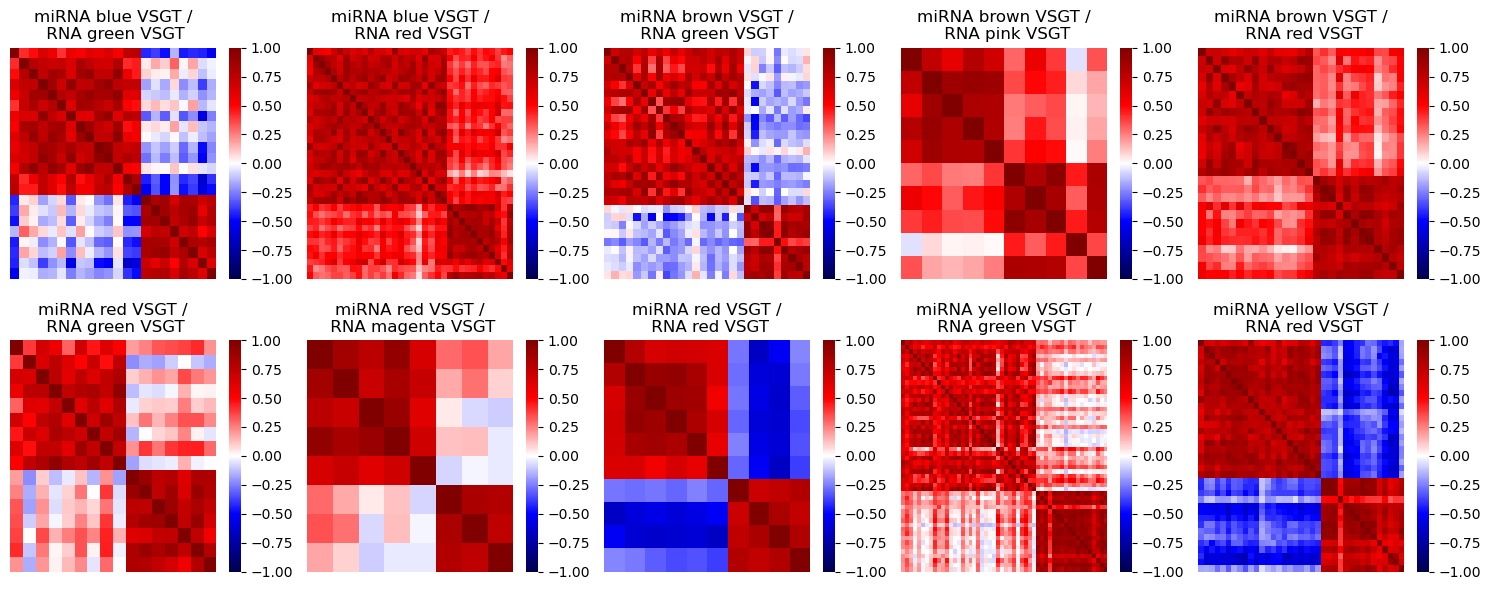

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcola il numero di colonne e righe
n_cols = 5
n_rows = 2

# Calcola il numero di plot
n_plots = len(interesting_modules)

# Crea la figura e gli assi
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3, n_rows*3))

# Itera sugli interesting_modules
for index, name in enumerate(interesting_modules):
    # Calcola la posizione dell'asse
    row = index // n_cols
    col = index % n_cols
    
    # Crea il dataframe per la correlazione
    df4corr = pd.concat([rna_counts_norm[rna_counts_norm.gene_name.isin(dict4corr[interesting_modules[index]]['targets'])].set_index('gene_name'), 
                        mirna_counts_norm.loc[dict4corr[interesting_modules[index]]['mirna']]]).T
    
    # Crea il heatmap
    sns.heatmap(df4corr.corr(method='spearman'), vmin=-1, vmax=1, cmap='seismic', ax=axs[row, col])
    
    # Imposta il titolo
    axs[row, col].set_title(name.replace('_RNA', ' /\n RNA').replace('_', ' '))
    
    # Nascondi gli assi
    axs[row, col].set_yticks([])
    axs[row, col].set_xticks([])

# Nascondi gli assi vuoti
for i in range(n_plots, n_rows*n_cols):
    row = i // n_cols
    col = i % n_cols
    axs[row, col].axis('off')

# Mostra la figura
plt.tight_layout()
plt.show()
